# Лабораторна робота №4
### Студентки групи МІТ-31 (підгрупа 1)
### Борук Дарини Ігорівни

#### Part1

In [173]:
import tensorflow as tf
import numpy as np
import torch

tf_scalar = tf.constant(33)
print("Scalar - ", tf_scalar)

tf_vector = tf.Variable([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
print("Vector a - ", tf_vector)

tf_matrix_a = tf.constant([[10, 20],
                        [20, 10]])
print("Matrix a - ", tf_matrix_a)

ar_matrix_b = np.arange(30, 34, dtype=np.int32)
tf_matrix_b = tf.constant(ar_matrix_b, shape=(2, 2))
print("Matrix b - ", tf_matrix_b)

tf_tensor_a = tf.constant([[[10, 20, 30],
                       [40, 50, 60]],
                      [[70, 80, 90],
                       [20, 50, 80]]])
print("Tensor a - ", tf_tensor_a)

tf_tensor_b = torch.randint(3, 10, (2, 2, 3))
print("Tensor b - ", tf_tensor_b)


print("\nOperations on tensors:")
sum_tensors = tf.add(tf_tensor_a, tf_tensor_b)
print("* Sum - ", sum_tensors)
dif_tensors = tf.subtract(tf_tensor_a, tf_tensor_b)
print("* Difference - ", dif_tensors)
mul_tensors = tf.multiply(tf_tensor_a, tf_tensor_b)
print("* Multiplication - ", mul_tensors)
div_tensors = tf.divide(tf_tensor_a, tf_tensor_b)
print("* Division - ", div_tensors)
matrix_product = tf.matmul(tf_matrix_a, tf_matrix_b)
print("* Matrix Multiplication - ", matrix_product)
sin_tensor = tf.sin(div_tensors)
print("* Sine function:", sin_tensor)
cos_tensor = tf.cos(div_tensors)
print("* Cosine function:", cos_tensor)
tf_matrix_b_element = tf_matrix_b[1][1]
print("* Value of a specific element - ", tf_matrix_b_element) #element from the 1st row and 1st column
sliced_vector = tf_vector[-3:]
print("* Vector slice - ", sliced_vector) #slice the last three elements of the vector
tf_tensor_a_reshaped = tf.reshape(tf_tensor_a, shape=(3, 2, 2))
print("* Reshaped tensor a - ", tf_tensor_a_reshaped)
tf_tensor_b_reshaped = tf.reshape(tf_tensor_b, shape=(1, 12))
print("* Reshaped tensor b - ", tf_tensor_b_reshaped)


Scalar -  tf.Tensor(33, shape=(), dtype=int32)
Vector a -  <tf.Variable 'Variable:0' shape=(10,) dtype=int32, numpy=array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])>
Matrix a -  tf.Tensor(
[[10 20]
 [20 10]], shape=(2, 2), dtype=int32)
Matrix b -  tf.Tensor(
[[30 31]
 [32 33]], shape=(2, 2), dtype=int32)
Tensor a -  tf.Tensor(
[[[10 20 30]
  [40 50 60]]

 [[70 80 90]
  [20 50 80]]], shape=(2, 2, 3), dtype=int32)
Tensor b -  tensor([[[3, 5, 7],
         [6, 5, 4]],

        [[4, 3, 3],
         [6, 7, 3]]])

Operations on tensors:
* Sum -  tf.Tensor(
[[[13 25 37]
  [46 55 64]]

 [[74 83 93]
  [26 57 83]]], shape=(2, 2, 3), dtype=int32)
* Difference -  tf.Tensor(
[[[ 7 15 23]
  [34 45 56]]

 [[66 77 87]
  [14 43 77]]], shape=(2, 2, 3), dtype=int32)
* Multiplication -  tf.Tensor(
[[[ 30 100 210]
  [240 250 240]]

 [[280 240 270]
  [120 350 240]]], shape=(2, 2, 3), dtype=int32)
* Division -  tf.Tensor(
[[[ 3.33333333  4.          4.28571429]
  [ 6.66666667 10.         15.        ]

#### Part2 - 3

#### For regression

Training Loss (MSE) on Training Data: [68.74081420898438, 68.74081420898438]
Test Loss (MSE) on Test Data: [49.716373443603516, 49.716373443603516]


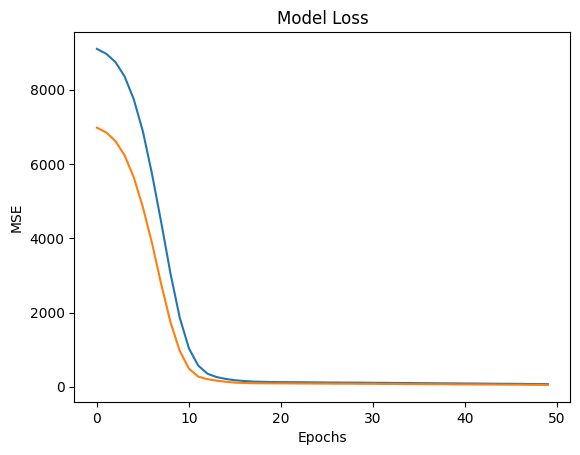

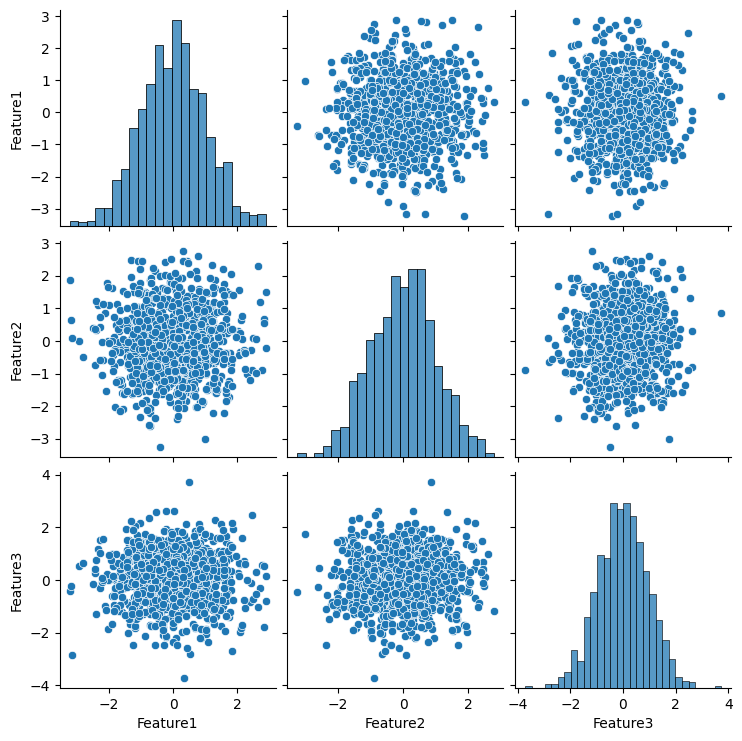

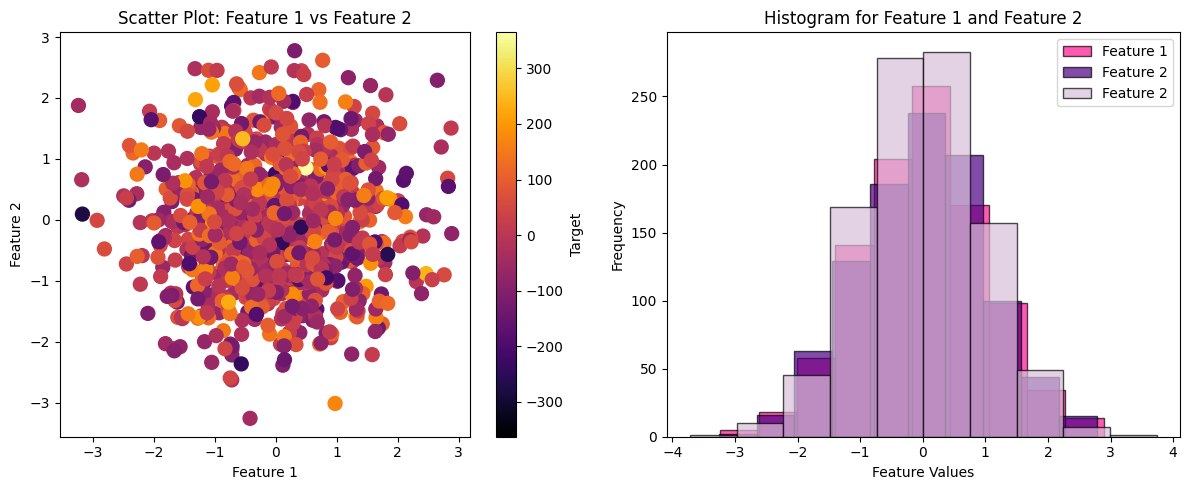

7/7 [==============================] - 0s 1ms/step


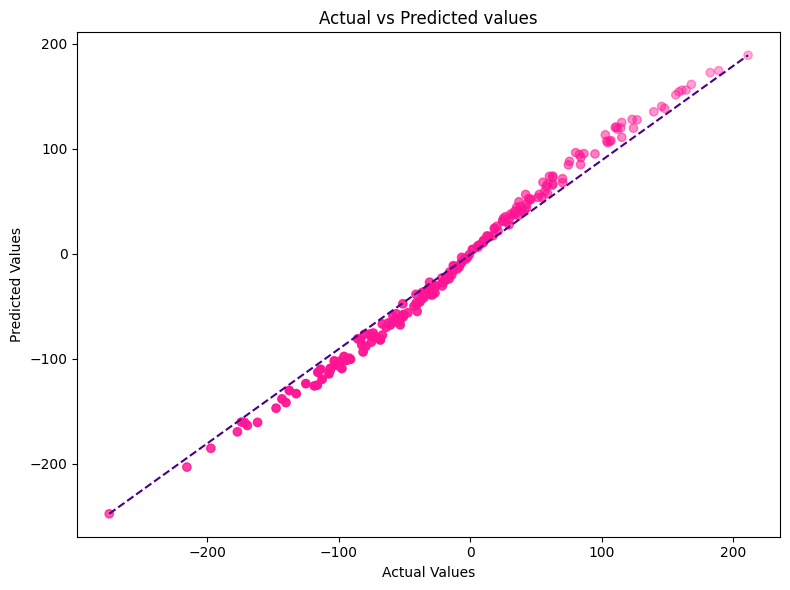

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_regression
num_features = 3
X, y = make_regression(n_samples=1000, n_features=num_features, n_informative=1, noise=0.1, random_state=33)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('regression.csv', index=False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#Neural network model with layers
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

#Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

#Evaluate the model on the train data and test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Training Loss (MSE) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (MSE) on Test Data:", test_loss)

#Visualization of learning results
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Model Loss')
plt.show()

#Visualization of the data
import seaborn as sns
sns.pairplot(data[['Feature1', 'Feature2', 'Feature3']])
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Feature1'], data['Feature2'], c=data['Target'], cmap='inferno', s=100)
plt.colorbar(label='Target')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot: Feature 1 vs Feature 2')

plt.subplot(1, 2, 2)
plt.hist(data['Feature1'], bins=10, color='deeppink', alpha=0.7, edgecolor='black', label='Feature 1')
plt.hist(data['Feature2'], bins=10, color='indigo', alpha=0.7, edgecolor='black', label='Feature 2')
plt.hist(data['Feature3'], bins=10, color='thistle', alpha=0.7, edgecolor='black', label='Feature 2')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram for Feature 1 and Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

#Visualization of the real and predicted values
y_pred = model.predict(X_test)
plt.figure(figsize=(8, 6))
distance = np.abs(y_test - y_pred) 
max_distance = np.max(distance)
for i in range(len(y_test)):
    alpha = 1 - (distance[i] / max_distance)  #Transparency depending on the distance
    plt.scatter(y_test[i], y_pred[i], c='deeppink', alpha=alpha)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], ls='--', c ='indigo')
plt.title('Actual vs Predicted values')
plt.tight_layout()
plt.show()

#### For classification

7/7 [==============================] - 0s 1ms/step
Accuracy: 97.50%
Training Loss (Accuracy) on Training Data: [0.08245716989040375, 0.9712499976158142]
Test Loss (Accuracy) on Test Data: [0.09531485289335251, 0.9750000238418579]


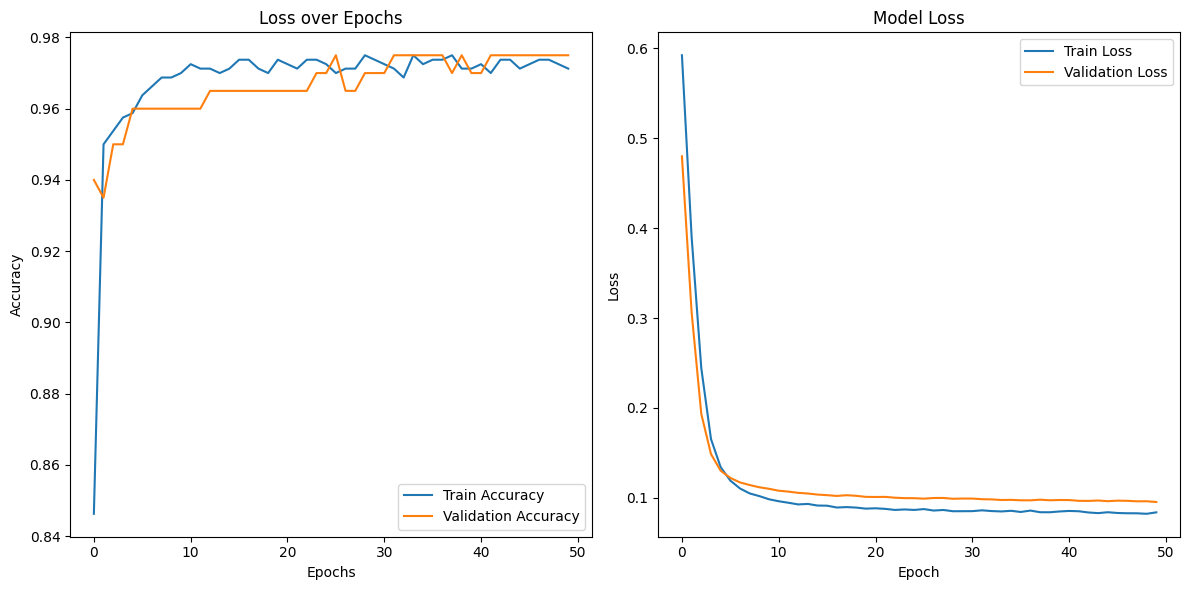

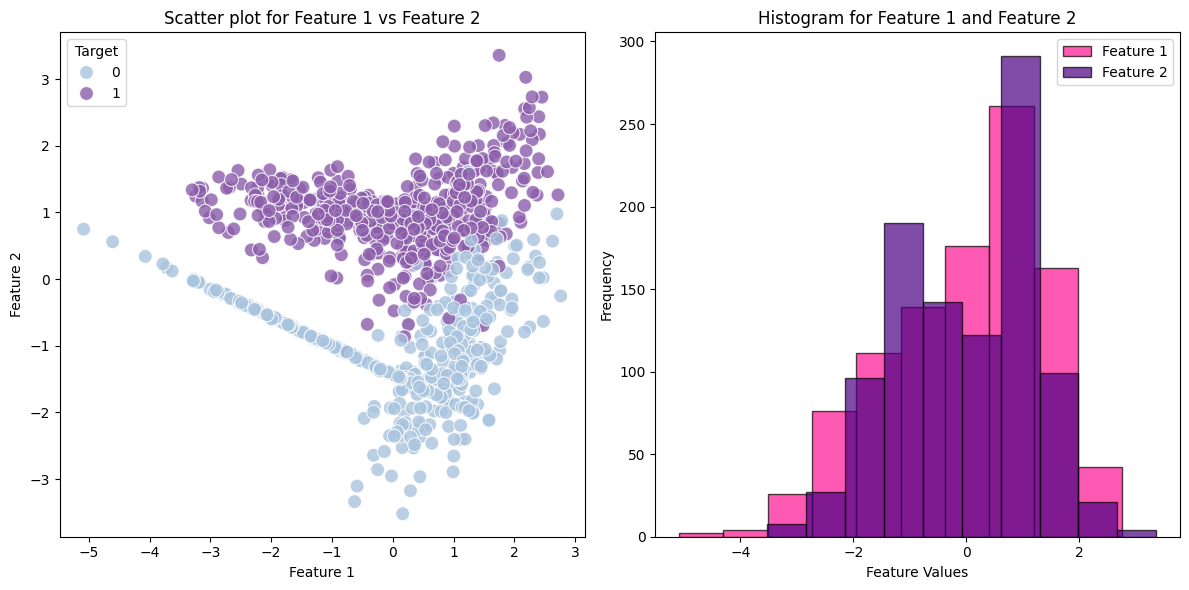

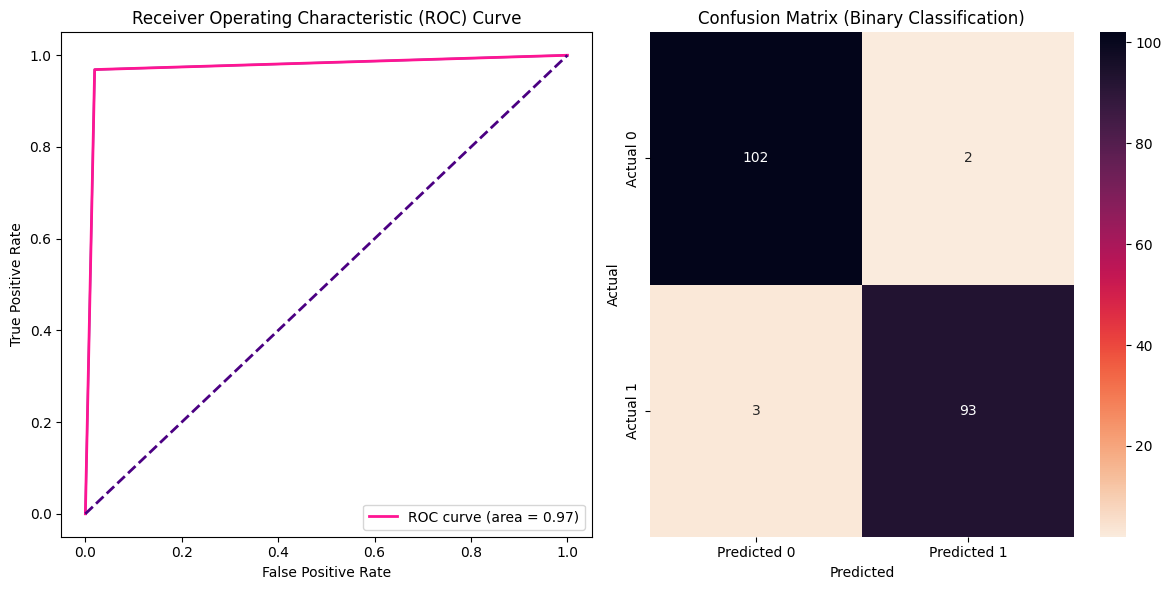

In [181]:
import pandas as pd
from sklearn.datasets import make_classification
num_samples=1000
num_features=2

X, y = make_classification(
    n_samples=num_samples,
    n_features=num_features,
    n_informative=2,
    n_redundant=0,
    n_classes=2, 
    random_state=13
)

data = pd.DataFrame(X, columns = [f"Feature{i+1}" for i in range(num_features)])
data['Target'] = y

data.to_csv('binary_classification.csv', index=False)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

#Neural network model with layers
model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X.shape[1],)),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

#Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

#Evaluate the classification accuracy for binary classification
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

#Evaluate the model on the train data and test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("Training Loss (Accuracy) on Training Data:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss (Accuracy) on Test Data:", test_loss)

#Visualization of learning results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

#Visualization of the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data['Feature1'], y=data['Feature2'], hue=data['Target'], palette='BuPu', s=100, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot for Feature 1 vs Feature 2')

plt.subplot(1, 2, 2)
plt.hist(data['Feature1'], bins=10, color='deeppink', alpha=0.7, edgecolor='black', label='Feature 1')
plt.hist(data['Feature2'], bins=10, color='indigo', alpha=0.7, edgecolor='black', label='Feature 2')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.title('Histogram for Feature 1 and Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

#Visualization of the real and predicted values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='indigo', lw=2, linestyle='--')
plt.legend(loc='lower right')

conf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='rocket_r',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Binary Classification)')
plt.tight_layout()
plt.show()